In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # 1. Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # 2. Training loop
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                
                # Forward pass: Linear combination
                linear_output = np.dot(x_i, self.weights) + self.bias
                
                # Apply activation
                y_predicted = self.activation_func(linear_output)

                # Perceptron Update Rule
                # If y_predicted == y_true, update is 0
                update = self.lr * (y[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

In [3]:
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 25.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 37.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 38.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 3/7 [fonttools]]  WARNING: The scripts fonttools, pyftmerge, pyftsubset and ttx are installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 23.7 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 38.5 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


Perceptron classification accuracy: 100.00%


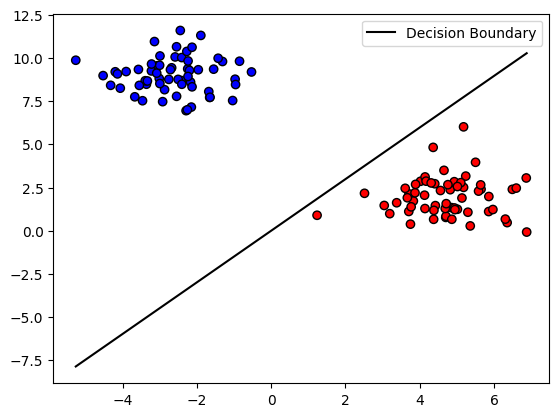

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

# 1. Generate linearly separable data
X, y = make_blobs(
    n_samples=150, 
    n_features=2, 
    centers=2, 
    cluster_std=1.05, 
    random_state=42
)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train the Perceptron
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)

# 4. Evaluate
predictions = p.predict(X_test)
print(f"Perceptron classification accuracy: {accuracy_score(y_test, predictions) * 100:.2f}%")

# 5. Visualizing the Decision Boundary (Optional helper function)
def plot_decision_boundary(X, y, model):
    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])
    
    # Calculate the decision boundary line: w1*x1 + w2*x2 + b = 0
    # x2 = -(w1*x1 + b) / w2
    x1_1 = (-model.weights[0] * x0_1 - model.bias) / model.weights[1]
    x1_2 = (-model.weights[0] * x0_2 - model.bias) / model.weights[1]

    plt.plot([x0_1, x0_2], [x1_1, x1_2], "k", label="Decision Boundary")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors='k')
    plt.legend()
    plt.show()

plot_decision_boundary(X_train, y_train, p)